In [ ]:
import pandas as pd
import numpy as np

In [ ]:
region = pd.read_csv("noc_regions.csv")

In [ ]:
region.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
data = pd.read_csv("athlete_events.csv")

In [ ]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Análisis exploratorio de los datos

1. cargar los datos
2. revisión inicial
3. resumen estadistico
4. visiualización final
5. manejo de los valores faltantes
6. análisis de distribución
7. identificación de valores atípicos
8. análisis de relaciones
9. segmentación y agrupación
10. iteración y descubrimiento
11. documentación

Descripción del conjunto

In [ ]:
region.shape

(230, 3)

In [ ]:
data.shape

(271116, 15)

Preguntas

1. ¿cuántas medallas se han dado en cada categoria?
2. ¿qué deportes son los más populares?
3. ¿cuántos hombres y mujeres han participado?

In [ ]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Manejo de datoa faltantes

In [ ]:
x = pd.Series([1, 2, 3, np.nan, 5])
x

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,5.0


In [ ]:
x.mean()

2.75

In [ ]:
x = x.fillna(0) #rella el valor faltante (NaN) con 0#
x #altera el resutado#

,0
0,1.0
1,2.0
2,3.0
3,0.0
4,5.0


In [ ]:
x.mean()

2.2

In [ ]:
#cambio el valor faltante por el promedio original de esa serie#
x = x.fillna(x.mean()) #lo m'as recomendable para no alterar el resultado#
x

,0
0,1.00
1,2.00
2,3.00
3,2.75
4,5.00


In [ ]:
x.mean()

2.75

otra forma

In [ ]:
numeric_columns = data. select_dtypes(include = ['number'])
numeric_columns  #seleccionan una columna con un tpo de dato numerico#
#usamos un for para rellenar los datos que faltan#
for column in numeric_columns.columns:
  data[column] = data[column].fillna(data[column].mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
#para las medallas por ser tipo texto es más sencillo porque se puede rellenar con lo que sea#
data['Medal'] = data['Medal'].fillna('Sin medalla')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Análisis del conjunto de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

histograma

<Axes: xlabel='Age', ylabel='Count'>

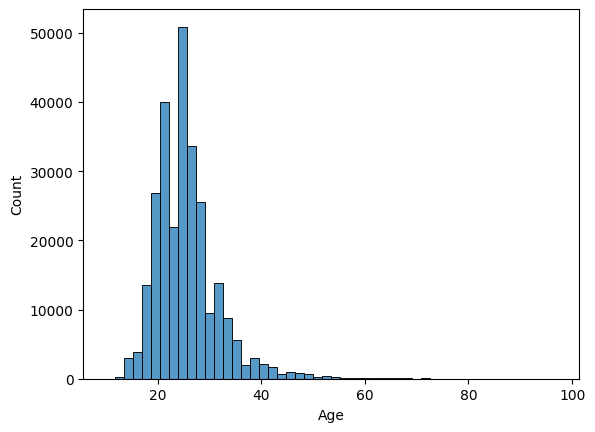

In [ ]:
sns.histplot(data= data, x = 'Age', bins = 50)

conocer mejor la distribución de la edad

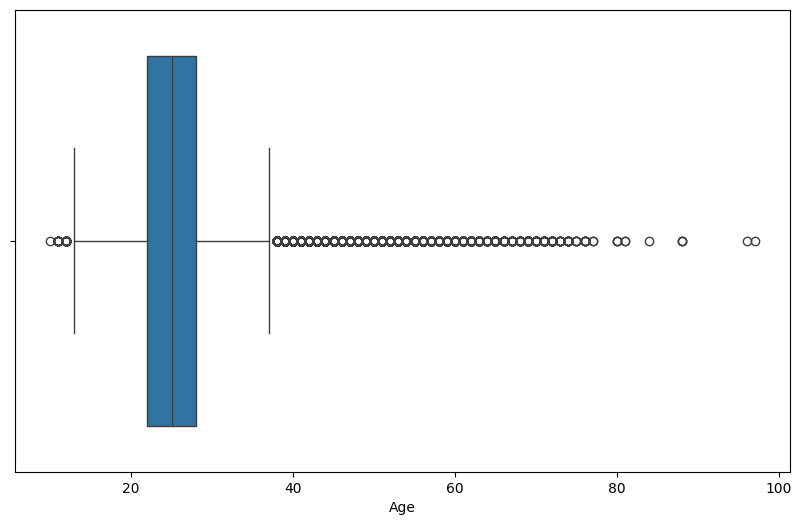

In [ ]:
#boxplot#
plt.figure(figsize=(10,6))
sns.boxplot(x = data['Age'])
plt.show()

In [ ]:
#en qué punto los datos se dejan de considerar atipicos
from scipy import stats

In [ ]:
#rango intercuartílico, nos sirve para calcular el valor máximo que se considera normal#
stats.iqr(data['Age'])

6.0

In [ ]:
#valor máximo que se considera normal#
28 + (1.5*6)

37.0

In [ ]:
#valor mínimo que se considera normal#
22 - (1.5*6)

13.0

In [ ]:
atletas_mayores = data[data['Age'] > 37]
atletas_mayores.shape

(11928, 15)

In [ ]:
atletas_menores = data[data['Age'] < 13]
atletas_menores.shape

(53, 15)

In [ ]:
#como saber que deportes practican#
atletas_mayores['Sport'].value_counts().head()

,count
Sport,
Shooting,3178
Art Competitions,2226
Equestrianism,1997
Sailing,1040
Fencing,1031


In [ ]:
atletas_menores['Sport'].value_counts().head()

,count
Sport,
Swimming,25
Figure Skating,15
Rowing,5
Gymnastics,5
Athletics,2


Información en las distintas categorías

In [ ]:
#obtener todas las columnas con texto#
text_columns = data.select_dtypes(include = ['object'])
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [ ]:
for column in text_columns.columns:
  if column != 'Name':
    print(data[column].value_counts().head())
    print()

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

Agrupar los datos

In [ ]:
#agrupar por año. información de la edad, estatura y peso#
#saber el valor minimo, maximo y promedio de cada columna de los último 5 juegos#
data.groupby("Year")[["Age", "Height", "Weight"]].agg(["min", "max", "mean"]).tail()

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974

In [ ]:
data.groupby(["Season", "Sex"])['Age'].agg(["min", "max", "mean"])

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.674297
       M    10.0  97.0  26.396239
Winter F    11.0  48.0  24.015114
       M    12.0  58.0  25.504698

In [ ]:
data.groupby(["Season", "Sex"])[['Team', 'Sport', 'Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [ ]:
data.groupby(['Medal', 'Season', 'Sex'])[['Age', 'Height', 'Weight']].mean()

Age      Height     Weight
Medal       Season Sex                                  
Bronze      Summer F    24.634359  171.183455  64.052365
                   M    26.323907  179.426277  76.387936
            Winter F    25.115578  167.403429  61.382748
                   M    26.384883  178.890860  77.100403
Gold        Summer F    24.213271  171.665372  64.378546
                   M    26.473703  179.872225  76.872683
            Winter F    25.202636  167.619718  62.426866
                   M    26.596487  179.537387  77.784048
Silver      Summer F    24.292628  171.391190  64.056271
                   M    26.627032  179.483286  76.488482
            Winter F    25.240527  167.974450  62.260945
                   M    26.430566  179.085914  77.253308
Sin medalla Summer F    23.540824  168.357685  60.593038
                   M    26.382399  177.587796  73.735763
            Winter F    23.855208  167.406713  60.885655
                   M    25.377882  177.842456  74.832962

Gráficas

<Axes: xlabel='Height', ylabel='Weight'>

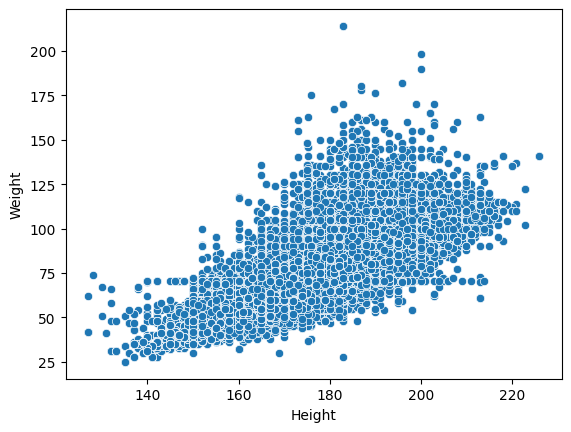

In [ ]:
#correlación entre dos variables#
#gráfico de puntos#
sns.scatterplot(data=data, x='Height', y='Weight')

<Axes: xlabel='Height', ylabel='Weight'>

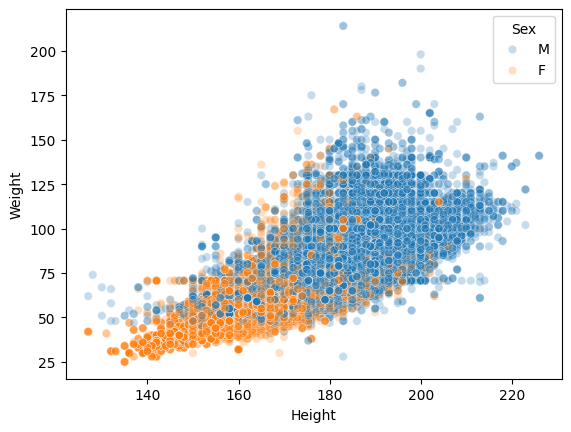

In [ ]:
#distinción por el sexo#
sns.scatterplot(data=data, x='Height', y='Weight', hue='Sex', alpha=0.25)
#parámetro alpha para separar los puntos#

In [ ]:
#método corr para saber la correlación#
data[['Age', 'Height', 'Weight']].corr()
#si la variable se acerca más a 1 quiere decir que tiene una correlación mayor#

,Age,Height,Weight
Age,1.000000,0.106944,0.161847
Height,0.106944,1.000000,0.786609
Weight,0.161847,0.786609,1.000000


<Axes: >

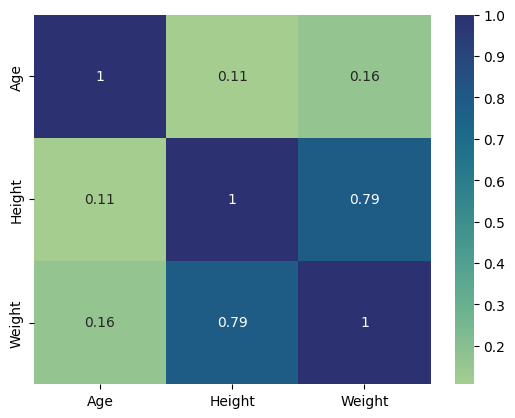

In [ ]:
#mapa de calor#
sns.heatmap(data[['Age', 'Height', 'Weight']].corr(), annot=True, cmap='crest' )
#annot = true pars que se vean los valores númericos#

como se ha distribuido la edad entre hombres y mujeres

<Axes: xlabel='Age', ylabel='Count'>

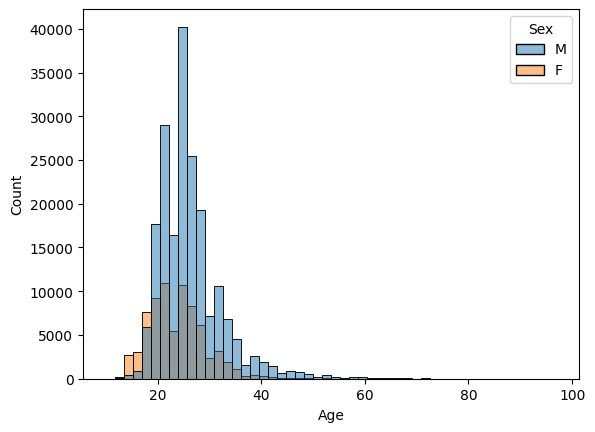

In [ ]:
sns.histplot(data=data, x='Age', hue='Sex', bins=50)

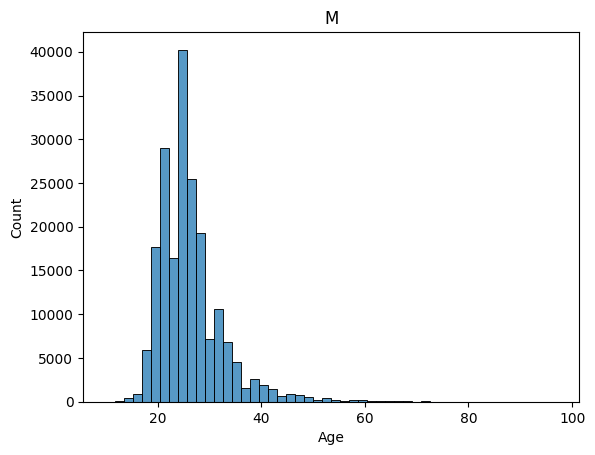

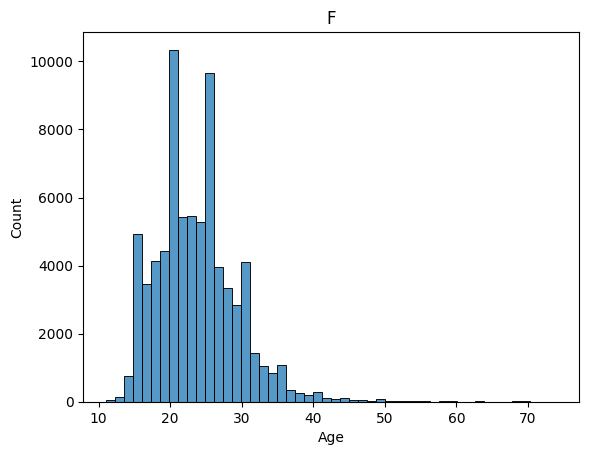

In [ ]:
#histograma único para cada sexo#
for value in data['Sex'].value_counts().index:
  sns.histplot(data=data[data['Sex'] == value], x='Age', bins=50)
  plt.title(value) #título valor#
  plt.show()

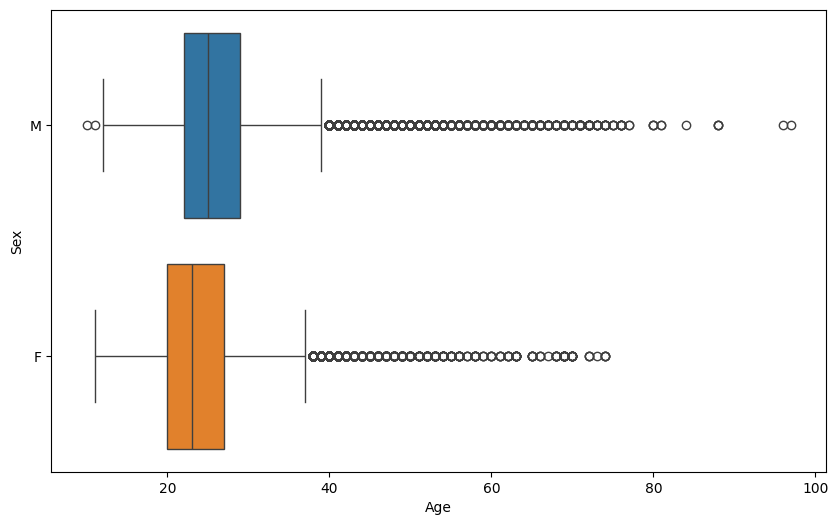

In [ ]:
#boxplt para representar mejor las edades#
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age', y='Sex', hue='Sex')
plt.show()

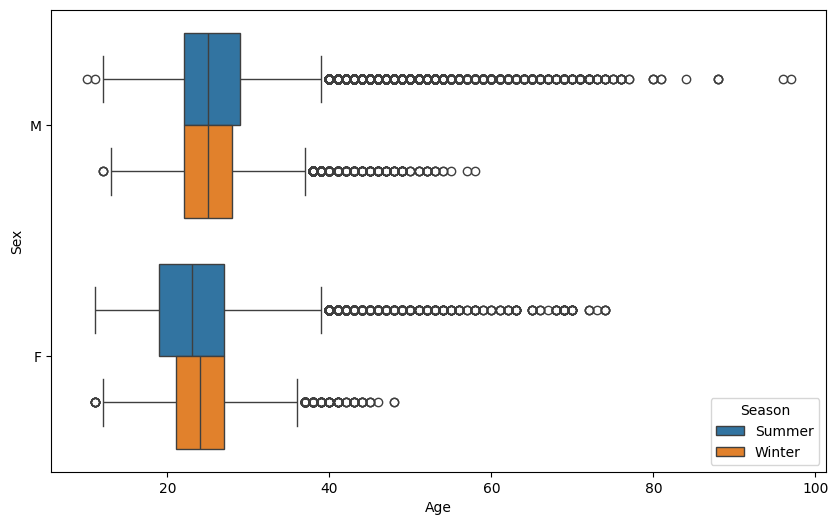

In [ ]:
#distinción por temporadas#
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age', y='Sex', hue='Season')
plt.show()

<Axes: xlabel='Age', ylabel='Sex'>

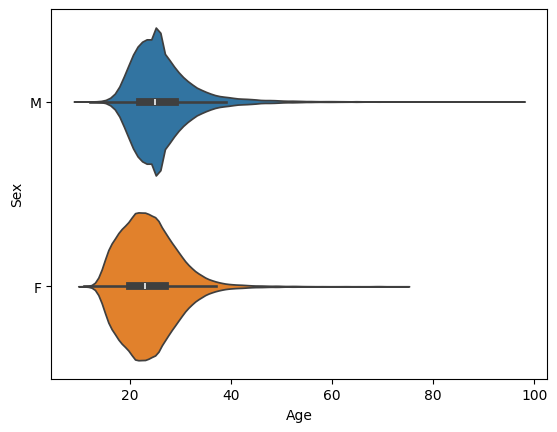

In [ ]:
#distribución de los datos con gráficos de violin#
sns.violinplot(data=data, x='Age', y='Sex', hue='Sex')

como se han comportado las edades a lo largo del tiempo

<Axes: xlabel='Year', ylabel='Age'>

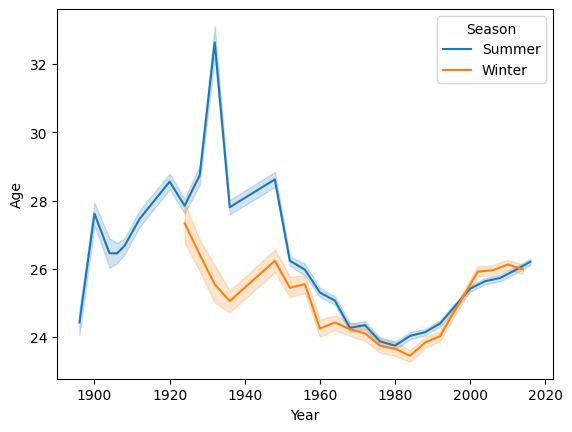

In [ ]:
#gráfico de línea#
sns.lineplot(data=data, x='Year', y='Age', hue='Season')